In [1]:
# IF YOU EVER MAKE CHANGES TO FILES OUTSIDE OF NOTEBOOK, YOU MUST RESTART KERNEL
from mysql_to_pandas import get_dataframe_from_mysql
database = "DS2002FinalData"

In [2]:
mhealth_df = get_dataframe_from_mysql("MentalHealthAndSACrimeRate", database)
gapminder_df = get_dataframe_from_mysql("Gapminder", database)

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'localhost' ([Errno 61] Connection refused)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [3]:
# Example getting dataframes from GCP instance
mhealth_df = get_dataframe_from_mysql("MentalHealthAndSACrimeRate", database, local=False)
gapminder_df = get_dataframe_from_mysql("Gapminder", database, local=False)

In [4]:
mhealth_df

,Entity,Year,Schizophrenia (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Sexual Violence Rate
0,Albania,2005,0.196538,3.385416,0.497503,2.223407,1.716585,2.832771
1,Albania,2006,0.197004,3.387210,0.497997,2.222417,1.737167,2.756124
2,Albania,2007,0.197636,3.388914,0.497442,2.217203,1.766903,3.186457
3,Albania,2008,0.198306,3.390168,0.497332,2.210642,1.798550,2.388888
4,Albania,2009,0.198905,3.391018,0.498324,2.206033,1.824955,2.599662
...,...,...,...,...,...,...,...,...
586,Yemen,2005,0.172946,4.830517,1.224141,4.010933,0.627500,0.000000
587,Yemen,2006,0.173065,4.832736,1.237537,4.012598,0.628636,0.333520
588,Yemen,2007,0.173181,4.835215,1.263182,4.014557,0.630894,0.246047
589,Yemen,2008,0.173272,4.837639,1.293243,4.017453,0.633496,0.357986


In [4]:
gapminder_df

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,Belgium,2003,4.2,78.5,1.70,10426169.0,2.396593e+11,Europe,Western Europe
1,Bulgaria,2003,15.5,72.3,1.25,7805041.0,1.483846e+10,Europe,Eastern Europe
2,Canada,2003,5.2,79.8,1.54,31596593.0,7.737140e+11,Americas,Northern America
3,Croatia,2003,6.3,75.1,1.38,4390291.0,2.464898e+10,Europe,Southern Europe
4,Czech Republic,2003,4.8,75.6,1.20,10211846.0,6.426426e+10,Europe,Eastern Europe
...,...,...,...,...,...,...,...,...,...
558,Spain,2011,3.8,82.0,1.47,46708366.0,7.171940e+11,Europe,Southern Europe
559,Sweden,2011,2.4,81.7,1.90,9462352.0,3.167986e+11,Europe,Northern Europe
560,Switzerland,2011,3.8,82.6,1.51,7925813.0,3.009384e+11,Europe,Western Europe
561,Tajikistan,2011,43.3,70.1,3.81,7753925.0,2.060715e+09,Asia,Central Asia


In [5]:
# How alcohol use disorders has affected life expectany per country over time 
# How has...
import pandas as pd
import seaborn as sb
import matplotlib as plt

In [6]:
gap_mhealth = pd.merge(mhealth_df, gapminder_df, left_on=['Entity', 'Year'], right_on=['country', 'year'])

In [7]:
gap_mhealth = gap_mhealth.drop(columns=["country", "year"])
gap_mhealth

,Entity,Year,Schizophrenia (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Sexual Violence Rate,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,Albania,2005,0.196538,3.385416,0.497503,2.223407,1.716585,2.832771,18.3,76.2,1.92,3082172.0,4.793518e+09,Europe,Southern Europe
1,Albania,2006,0.197004,3.387210,0.497997,2.222417,1.737167,2.756124,17.4,76.4,1.85,3050741.0,5.033194e+09,Europe,Southern Europe
2,Albania,2007,0.197636,3.388914,0.497442,2.217203,1.766903,3.186457,16.7,76.6,1.80,3010849.0,5.330153e+09,Europe,Southern Europe
3,Albania,2008,0.198306,3.390168,0.497332,2.210642,1.798550,2.388888,16.0,76.8,1.76,2968026.0,5.740575e+09,Europe,Southern Europe
4,Albania,2009,0.198905,3.391018,0.498324,2.206033,1.824955,2.599662,15.4,77.0,1.74,2929886.0,5.930013e+09,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Yemen,2005,0.172946,4.830517,1.224141,4.010933,0.627500,0.000000,54.5,64.6,5.39,20504385.0,1.184170e+10,Asia,Western Asia
559,Yemen,2006,0.173065,4.832736,1.237537,4.012598,0.628636,0.333520,51.9,65.0,5.20,21093973.0,1.221713e+10,Asia,Western Asia
560,Yemen,2007,0.173181,4.835215,1.263182,4.014557,0.630894,0.246047,49.4,65.2,5.01,21701105.0,1.262499e+10,Asia,Western Asia
561,Yemen,2008,0.173272,4.837639,1.293243,4.017453,0.633496,0.357986,47.0,65.7,4.83,22322699.0,1.308549e+10,Asia,Western Asia


/Users/shevyapanda/Desktop/DS 2002/DS2002Final/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shevyapanda/Desktop/DS 2002/DS2002Final/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shevyapanda/Desktop/DS 2002/DS2002Final/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/shevyapanda/Desktop/DS 2002/DS2002

<AxesSubplot: xlabel='Year', ylabel='life_expectancy'>

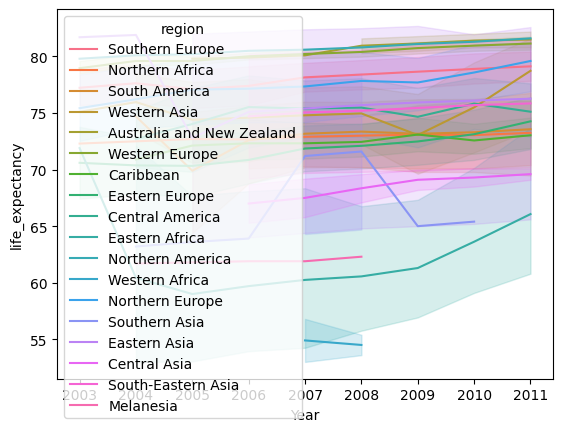

In [8]:
sb.lineplot(x='Year', y='life_expectancy', hue='region', data=gap_mhealth)


<AxesSubplot: xlabel='Sexual Violence Rate', ylabel='population'>

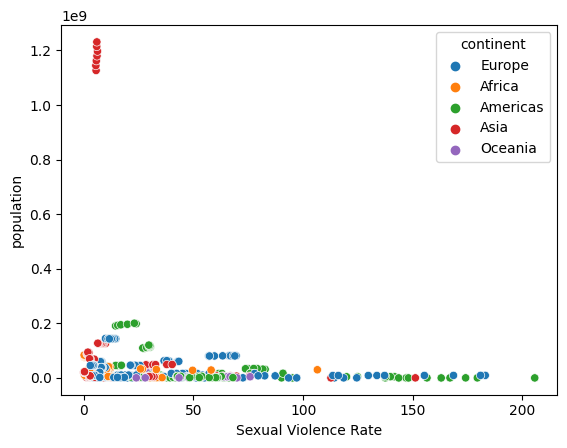

In [9]:
sb.scatterplot(x='Sexual Violence Rate', y='population',hue='continent', data=gap_mhealth)


<AxesSubplot: xlabel='Alcohol use disorders (%)', ylabel='Sexual Violence Rate'>

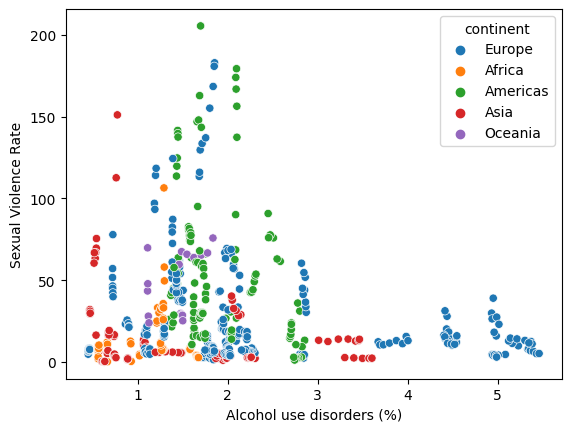

In [10]:
sb.scatterplot(x='Alcohol use disorders (%)', y='Sexual Violence Rate',hue='continent', data=gap_mhealth)


<AxesSubplot: xlabel='Year', ylabel='Sexual Violence Rate'>

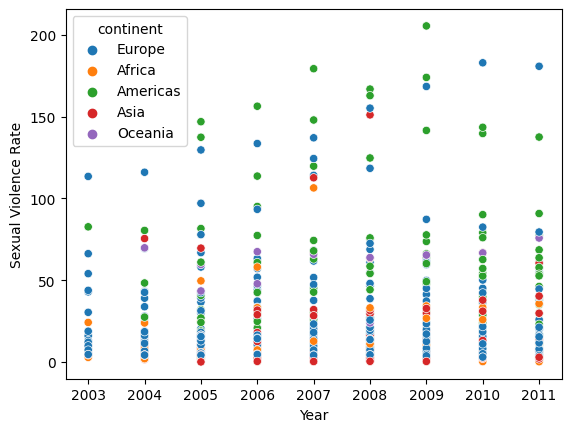

In [11]:
sb.scatterplot(x='Year', y='Sexual Violence Rate',hue='continent', data=gap_mhealth)


In [12]:
import pycountry
import plotly.graph_objects as go


In [14]:
gap_mhealth_country = gap_mhealth

# Create a new column in the DataFrame with the ISO codes
def get_iso_code(country_name):
    country = pycountry.countries.get(name=country_name)
    return country.alpha_3 if country else None

gap_mhealth_country['iso_code'] = gap_mhealth_country['Entity'].apply(get_iso_code)
gap_mhealth_country

,Entity,Year,Schizophrenia (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Sexual Violence Rate,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,iso_code
0,Albania,2005,0.196538,3.385416,0.497503,2.223407,1.716585,2.832771,18.3,76.2,1.92,3082172.0,4.793518e+09,Europe,Southern Europe,ALB
1,Albania,2006,0.197004,3.387210,0.497997,2.222417,1.737167,2.756124,17.4,76.4,1.85,3050741.0,5.033194e+09,Europe,Southern Europe,ALB
2,Albania,2007,0.197636,3.388914,0.497442,2.217203,1.766903,3.186457,16.7,76.6,1.80,3010849.0,5.330153e+09,Europe,Southern Europe,ALB
3,Albania,2008,0.198306,3.390168,0.497332,2.210642,1.798550,2.388888,16.0,76.8,1.76,2968026.0,5.740575e+09,Europe,Southern Europe,ALB
4,Albania,2009,0.198905,3.391018,0.498324,2.206033,1.824955,2.599662,15.4,77.0,1.74,2929886.0,5.930013e+09,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,Yemen,2005,0.172946,4.830517,1.224141,4.010933,0.627500,0.000000,54.5,64.6,5.39,20504385.0,1.184170e+10,Asia,Western Asia,YEM
559,Yemen,2006,0.173065,4.832736,1.237537,4.012598,0.628636,0.333520,51.9,65.0,5.20,21093973.0,1.221713e+10,Asia,Western Asia,YEM
560,Yemen,2007,0.173181,4.835215,1.263182,4.014557,0.630894,0.246047,49.4,65.2,5.01,21701105.0,1.262499e+10,Asia,Western Asia,YEM
561,Yemen,2008,0.173272,4.837639,1.293243,4.017453,0.633496,0.357986,47.0,65.7,4.83,22322699.0,1.308549e+10,Asia,Western Asia,YEM


In [15]:
fig = go.Figure(data=go.Choropleth(
    locations=gap_mhealth_country['iso_code'], 
    z = gap_mhealth_country['Anxiety disorders (%)'].astype(float), 
    text = gap_mhealth_country['Entity'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = "Anxiety Disorders",
))

fig.update_layout(
    title_text='Anxiety Disorders by Country',
    geo = dict(
        showland = True,
        landcolor = "lightgray",
        countrycolor = "white",
        showcoastlines = True,
        coastlinewidth = 0.5,
        showframe = False,
    ),
)

fig.show()

In [ ]:
# Assuming gap_mhealth is your DataFrame
gap_mhealth_country = gap_mhealth.groupby('Entity')['life_expectancy'].mean().reset_index()

# Create a new column with ISO codes
def get_iso_code(country_name):
    country = pycountry.countries.get(name=country_name)
    return country.alpha_3 if country else None

gap_mhealth_country['iso_code'] = gap_mhealth_country['Entity'].apply(get_iso_code)

# Create the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=gap_mhealth_country['iso_code'], 
    z = gap_mhealth_country['life_expectancy'].astype(float), 
    text = gap_mhealth_country['Entity'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = "Life Expectancy",
))

fig.update_layout(
    title_text='Life Expectancy by Country',
    geo = dict(
        showland = True,
        landcolor = "lightgray",
        countrycolor = "white",
        showcoastlines = True,
        coastlinewidth = 0.5,
        showframe = False,
    ),
)

fig.show()


In [17]:
graph3_corr = gap_mhealth['Sexual Violence Rate'].corr(gap_mhealth['Alcohol use disorders (%)'])

graph1_corr = gap_mhealth['Sexual Violence Rate'].corr(gap_mhealth['population'])

graph2_corr = gap_mhealth['Sexual Violence Rate'].corr(gap_mhealth['Year'])


#corr for infant mortality rate and depression
graph4_corr = gap_mhealth['infant_mortality'].corr(gap_mhealth['Depression (%)'])




<AxesSubplot: xlabel='Depression (%)', ylabel='infant_mortality'>

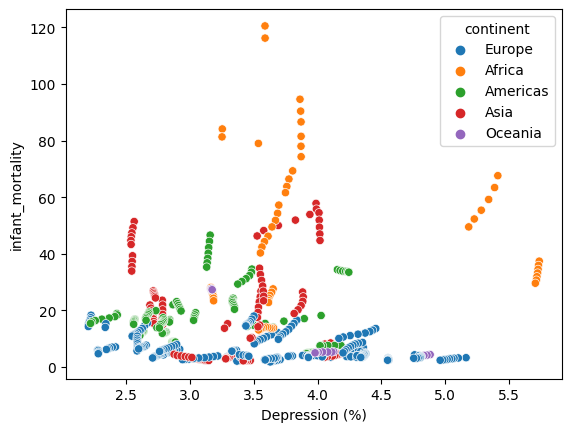

In [18]:
#graph for infant mortality rate and depression

sb.scatterplot(x='Depression (%)', y='infant_mortality',hue='continent', data=gap_mhealth)

In [21]:
#Other basic descriptive statistics- mean, mode, etc. of population, sexual violence rate, alcohol use disorders

print(gap_mhealth['population'].describe())
print(gap_mhealth['Sexual Violence Rate'].describe())
print(gap_mhealth['Alcohol use disorders (%)'].describe())


count    5.630000e+02
mean     3.793300e+07
std      1.332379e+08
min      1.029510e+05
25%      3.038362e+06
50%      8.763359e+06
75%      3.199285e+07
max      1.230985e+09
Name: population, dtype: float64
count    563.000000
mean      30.460904
std       35.374091
min        0.000000
25%        6.917979
50%       16.512905
75%       42.538513
max      205.577490
Name: Sexual Violence Rate, dtype: float64
count    563.000000
mean       1.921364
std        1.136488
min        0.450590
25%        1.269433
50%        1.709994
75%        2.134006
max        5.461357
Name: Alcohol use disorders (%), dtype: float64


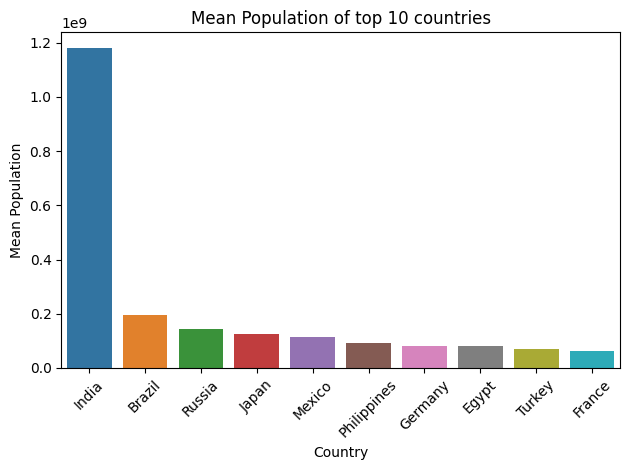

In [38]:
#Graph of mean population per country
import matplotlib.pyplot as plt

mean_population = gap_mhealth.groupby('Entity')['population'].mean().reset_index()
top_10_countries = mean_population.sort_values(by=['population'], ascending=False).head(10)
#plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sb.barplot(x='Entity', y='population', data=top_10_countries)
plt.title('Mean Population of top 10 countries')
plt.xlabel('Country')
plt.ylabel('Mean Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

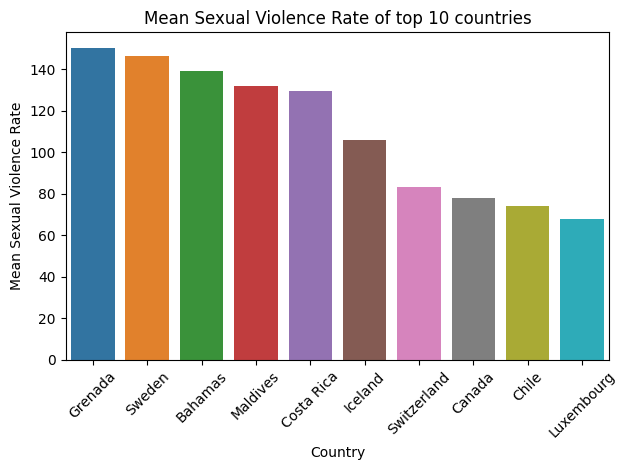

In [40]:
#graph of mean sexual violence rate per country
mean_sexual_violence_rate = gap_mhealth.groupby('Entity')['Sexual Violence Rate'].mean().reset_index()
top_10_rate = mean_sexual_violence_rate.sort_values(by=['Sexual Violence Rate'], ascending=False).head(10)
#plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sb.barplot(x='Entity', y='Sexual Violence Rate', data=top_10_rate)
plt.title('Mean Sexual Violence Rate of top 10 countries')
plt.xlabel('Country')
plt.ylabel('Mean Sexual Violence Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

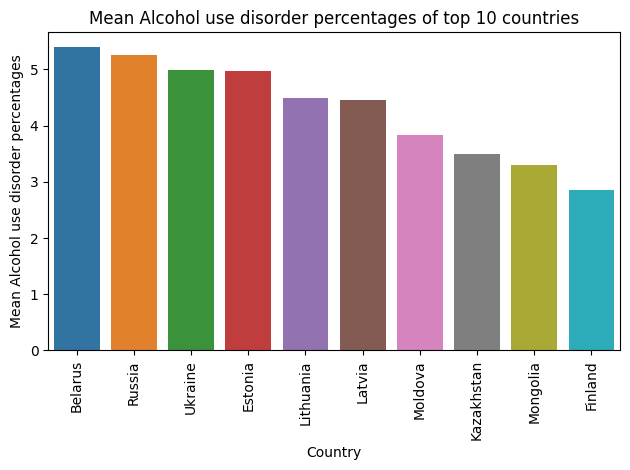

In [51]:
#graph of mean sexual violence rate per country
mean_alcohol_use_disorders = gap_mhealth.groupby('Entity')['Alcohol use disorders (%)'].mean().reset_index()
top_10_alcohol = mean_alcohol_use_disorders.sort_values(by=['Alcohol use disorders (%)'], ascending=False).head(10)
#plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sb.barplot(x='Entity', y='Alcohol use disorders (%)', data=top_10_alcohol)
plt.title('Mean Alcohol use disorder percentages of top 10 countries')
plt.xlabel('Country')
plt.ylabel('Mean Alcohol use disorder percentages')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
